## Parker Dunn
Created March 18, 2022
Created this second eda script to explore plotting the data that I am working with.

#### Things that I want to explore...
1. Try to create a player heat map
    * This seems like a great way to familiarize myself with where players are throughout the match
    * Also, seems like a very common practice

*Below will likely be done in a separate script*

2. Look at game events and identifying actions in the match from the full-stack of player metrics recorded
    * I will look at things like player velocity and acceleration to try to identify events in the game
    * I will likely spend some time looking at the match video to match up data and game events.
    * I expect that this step may start simple and become a bit more complex as I try to automate the identification of in-game events

3. Look at collective player movement to identify passages of play in the game.
    * I will need to be more familiar with the data overall to really be able to work with all player data simultaneously.
    * I am aiming to keep my data setup in a way that makes this easy eventually, but I'll start with identifying one players actions before trying to look at team events using the individual player data.

### Updates in this Script
March 18
* *TBD*

In [1]:
# IMPORTS
import pandas as pd
import os

from matplotlib import pyplot
import seaborn as sns

# OTHER SETUP

dir_list = os.listdir("./cleaned_data")

In [2]:
seed = dir_list[-1]
all_players_df = pd.read_csv("cleaned_data/"+seed, header=0, index_col=0)

dir_list = dir_list[:-2]

for file in dir_list:
    new_csv = pd.read_csv("cleaned_data/"+file, header=0, index_col=0)
    all_players_df = pd.concat([all_players_df, new_csv], axis=0)

print(all_players_df.head(2))
#print(all_players_df.jersey.unique())

jersey_ids = all_players_df.jersey.unique()
print("\nHere are all the unique jersey numbers for the match:")
print(jersey_ids)

                             athlete_id  device_id first_name last_name  \
0  09df479f-503d-4015-bf67-d069b75abb31      16508       Mike      Ryan   
1  09df479f-503d-4015-bf67-d069b75abb31      16508       Mike      Ryan   

  jersey  cs_time_unix       X       Y  accel  vel  smoothed_load    period  \
0    G03  158299148600  67.336  62.076    0.0  0.0          0.034  2nd Half   
1    G03  158299148610  67.334  62.074    0.0  0.0          0.030  2nd Half   

  position_name  game_time  
0       Forward          0  
1       Forward         10  

Here are all the unique jersey numbers for the match:
['G03' 'G23' 'G04' 'G17' 'G20' 'G02' 'G16' 'G22' 'G10' 'G18' 'G05' 'G08'
 'G21' 'G24' 'G11']


First step: Create a simple scatter plot for the positions of one player.

Things to consider:
* Need to figure out how the position data is setup.
* I know long & lat data have been converted to X, Y positions on the field... but relative to where? Corner of field? Center?

                             athlete_id  device_id first_name last_name  \
0  99f9cd94-e362-4d48-813c-7ea752d69fd1      11354       Adam   Barnett   
1  99f9cd94-e362-4d48-813c-7ea752d69fd1      11354       Adam   Barnett   

  jersey  cs_time_unix   X   Y  accel  vel  smoothed_load    period  \
0    G04  158298837600 NaN NaN    NaN  NaN            NaN  1st Half   
1    G04  158298837610 NaN NaN    NaN  NaN          0.266  1st Half   

  position_name  game_time  
0          Lock          0  
1          Lock         10   




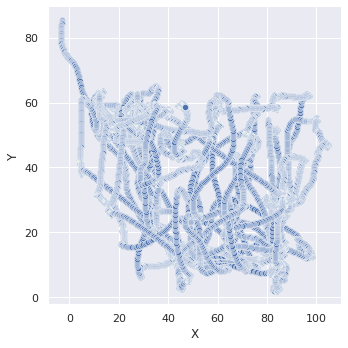

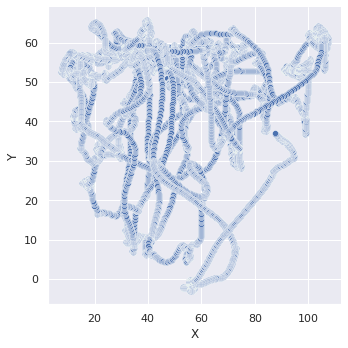

In [4]:
# Apply default seaborn theme
sns.set_theme(style="darkgrid")

player= all_players_df.loc[(all_players_df["jersey"] == "G04"), ["period","X","Y"]]
player_h1 = player.loc[(player.period=="1st Half"),["X","Y"]]
player_h2 = player.loc[(player.period=="2nd Half"),["X","Y"]]

player_v2 = all_players_df.loc[(all_players_df["jersey"] == "G04"), :]
print(player_v2.head(2),"\n\n")

figure_h1 = sns.relplot(data=player_h1,x="X",y="Y")
figure_h2 = sns.relplot(data=player_h2,x="X",y="Y")
